In [1]:
from sklearn.datasets import load_digits

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
digits = load_digits()

In [6]:
digits.images.shape

(1797, 8, 8)

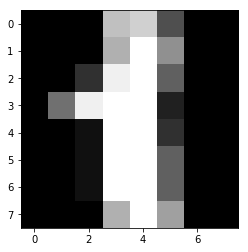

In [11]:
plt.imshow(digits.images[1], cmap='gray')

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
digits.data.shape

(1797, 64)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
trainX,testX, trainY, testY = train_test_split(digits.data, digits.target)

In [18]:
from sklearn.grid_search import GridSearchCV

In [39]:
params = {
    'C' : [0.05,0.5, 1.0]
}

In [61]:
grid = GridSearchCV(lr, params , n_jobs=-1,cv=5, scoring='accuracy')

In [62]:
grid.fit(trainX,trainY)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.05, 0.5, 1.0]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [42]:
grid.best_params_

{'C': 0.05}

In [63]:
grid.best_estimator_

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
grid.best_score_

0.9643652561247216

In [65]:
pred = grid.best_estimator_.predict(testX)

In [64]:
from sklearn.metrics import auc, confusion_matrix

In [66]:
confusion_matrix(y_pred=pred, y_true=testY)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 39,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 51,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  1,  0, 36,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 49]], dtype=int64)